In [1]:
import json
import pandas as pd
import os

In [2]:
def readData(filename):
    with open(filename,'r+') as file:
        dataset  = json.load(file)
    return dataset

In [5]:
data = readData(os.path.join('..', 'MSR_data_cleaned.json'))

In [8]:
df = pd.DataFrame(data)

In [29]:
df.index

Index(['', 'Access Gained', 'Attack Origin', 'Authentication Required',
       'Availability', 'CVE ID', 'CVE Page', 'CWE ID', 'Complexity',
       'Confidentiality', 'Integrity', 'Known Exploits', 'Publish Date',
       'Score', 'Summary', 'Update Date', 'Vulnerability Classification',
       'add_lines', 'codeLink', 'commit_id', 'commit_message', 'del_lines',
       'file_name', 'files_changed', 'func_after', 'func_before', 'lang',
       'lines_after', 'lines_before', 'parentID', 'patch', 'project',
       'project_after', 'project_before', 'vul', 'vul_func_with_fix'],
      dtype='object')

In [40]:
transposed_df = df.transpose()

In [41]:
columns_to_keep = ["vul", "lang", "project", "func_after", "func_before", "vul_func_with_fix", "Score", "Vulnerability Classification", "lines_after", "lines_before"]

# Keep only the specified columns
df_subset = transposed_df[columns_to_keep]

In [42]:
columns_to_keep = ["project", "lang", "vul", "func_after", "func_before"]

# Keep only the specified columns
df_subset = df_subset[columns_to_keep]

In [43]:
df_subset

,project,lang,vul,func_after,func_before
0,samba,C,0,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...
1,samba,C,0,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...
2,samba,C,0,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...
3,samba,C,0,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...
4,samba,C,0,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...
...,...,...,...,...,...
188631,Android,C,1,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...
188632,Android,C,1,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...
188633,Android,C,1,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...
188634,Android,C,1,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA..."


<AxesSubplot:>

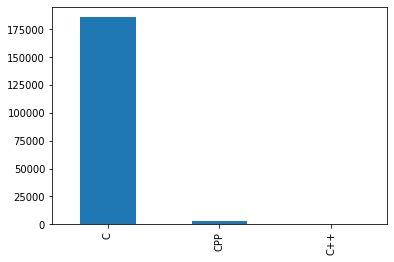

In [50]:
df_subset['lang'].value_counts(normalize = False).plot.bar()

<AxesSubplot:>

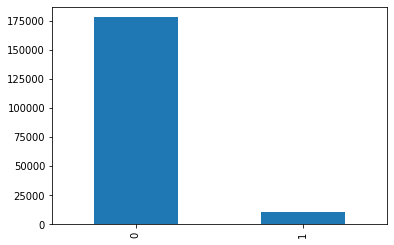

In [51]:
df_subset['vul'].value_counts(normalize = False).plot.bar()

In [52]:
print(df_subset["project"].value_counts())

Chrome         77173
linux          46855
Android         8691
qemu            3096
php             2709
               ...  
libbsd             1
libICE             1
torque             1
yodl               1
libtomcrypt        1
Name: project, Length: 310, dtype: int64


In [77]:
df_subset.to_csv(os.path.join('..', "data", 'full_dataset.csv'), index=False)

In [78]:
chrome = df_subset[df_subset["project"] == "Chrome"]
chrome.to_csv(os.path.join('..', "data", 'chrome_dataset.csv'), index=False)

In [79]:
linux = df_subset[df_subset["project"] == "linux"]
linux.to_csv(os.path.join('..', "data", 'linux_dataset.csv'), index=False)